In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv("TacoBellCustomers.csv")
df

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,State_Purchased
0,0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Indiana
1,1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Kansas
2,2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Indiana
3,3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,South Carolina
4,4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Washington
...,...,...,...,...,...,...,...,...,...,...,...
10690,8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,North Carolina
10691,8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Arkansas
10692,8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Michigan
10693,8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Missouri


In [152]:
df.drop(columns=['Unnamed: 0', 'Work_Experience', "ID", "Graduated"], inplace=True)
df.dropna(axis=0, inplace=True)



In [153]:
df['Gender'] = df['Gender'] == 'Male'
df.Gender = df.Gender.replace({True: 1, False: 0})
df['Ever_Married'] = df["Ever_Married"] == 'Yes'
df.Ever_Married = df.Ever_Married.replace({True: 1, False: 0})
df

,Gender,Ever_Married,Age,Profession,Spending_Score,Family_Size,State_Purchased
0,0,1,36,Engineer,Low,1.0,Indiana
1,1,1,37,Healthcare,Average,4.0,Kansas
3,1,1,59,Executive,High,2.0,South Carolina
4,0,0,19,Marketing,Low,4.0,Washington
5,1,1,47,Doctor,High,5.0,Kansas
...,...,...,...,...,...,...,...
10689,1,1,41,Artist,High,5.0,North Carolina
10691,1,0,35,Executive,Low,4.0,Arkansas
10692,0,0,33,Healthcare,Low,1.0,Michigan
10693,0,0,27,Healthcare,Low,4.0,Missouri


In [154]:
# get a list of unique values in col1
profUniqueValues = df['Profession'].unique()

# count how many times each unique value appears in profession
profcounts = df['Profession'].value_counts()

print(profcounts)

Artist           3191
Healthcare       1615
Entertainment    1178
Doctor            880
Engineer          874
Lawyer            795
Executive         739
Marketing         372
Homemaker         282
Name: Profession, dtype: int64


In [155]:
ssUniqueValues = df['Spending_Score'].unique()
sscounts = df['Spending_Score'].value_counts()

print(sscounts)

Low        5953
Average    2462
High       1511
Name: Spending_Score, dtype: int64


In [156]:
spUniqueValues = df['State_Purchased'].unique()
spcounts = df['State_Purchased'].value_counts()

print(spcounts)

California        1131
Texas              863
Florida            605
Ohio               501
Michigan           388
Illinois           364
Tennessee          350
Indiana            333
Georgia            326
North Carolina     326
New York           320
Missouri           318
Pennsylvania       277
Virgina            258
Arizona            230
Colorado           216
Kentucky           215
Wisconsin          189
Alabama            182
Washington         176
Louisana           166
Oregon             161
South Carolina     155
New Jersey         153
Oklahoma           149
Kansas             144
Maryland           124
Arkansas           124
Minnesota          121
Massachusetts      120
Mississippi        103
Utah                93
West Virgina        92
Nevada              86
New Mexico          79
Iowa                74
Connecticut         62
Nebraska            48
Hawaii              45
Idaho               43
Maine               37
Montana             34
New Hampshire       25
Delaware   

In [157]:
#assigning each profession a number
df['ProfessionFactor'] = df['Profession'].factorize()[0]
#dictionary comprehension: will iterate through unique values in column and show which numbers are assigned to which
profvalue_to_id = {value: id for id, value in enumerate(df['Profession'].unique())}
print(profvalue_to_id)


{'Engineer': 0, 'Healthcare': 1, 'Executive': 2, 'Marketing': 3, 'Doctor': 4, 'Artist': 5, 'Lawyer': 6, 'Entertainment': 7, 'Homemaker': 8}


In [158]:
df['Spending_Score_Factor'] = df['Spending_Score'].factorize()[0]
#dictionary comprehension: will iterate 
SSvalue_to_id = {value: id for id, value in enumerate(df['Spending_Score'].unique())}
print(SSvalue_to_id)

{'Low': 0, 'Average': 1, 'High': 2}


In [159]:
df['State_Purchased_Factor'] = df['State_Purchased'].factorize()[0]
#dictionary comprehension: will iterate 
SPvalue_to_id = {value: id for id, value in enumerate(df['State_Purchased'].unique())}
print(SPvalue_to_id)

{'Indiana': 0, 'Kansas': 1, 'South Carolina': 2, 'Washington': 3, 'Idaho': 4, 'Ohio': 5, 'Virgina': 6, 'Arizona': 7, 'Pennsylvania': 8, 'Georgia': 9, 'Tennessee': 10, 'Texas': 11, 'Hawaii': 12, 'Massachusetts': 13, 'Florida': 14, 'Colorado': 15, 'Utah': 16, 'Minnesota': 17, 'Missouri': 18, 'Nebraska': 19, 'Maryland': 20, 'California': 21, 'Michigan': 22, 'Illinois': 23, 'Connecticut': 24, 'West Virgina': 25, 'Kentucky': 26, 'Wisconsin': 27, 'New York': 28, 'Oklahoma': 29, 'Arkansas': 30, 'Iowa': 31, 'Louisana': 32, 'Oregon': 33, 'Mississippi': 34, 'North Carolina': 35, 'New Jersey': 36, 'Maine': 37, 'Alabama': 38, 'Nevada': 39, 'South Dakota': 40, 'Montana': 41, 'Vermont': 42, 'Wyoming': 43, 'New Hampshire': 44, 'New Mexico': 45, 'Rhode Island': 46, 'North Dakota': 47, 'Delaware': 48, 'Alaska': 49}


In [160]:
df2 = df.copy()
df2.drop(columns=["Profession", "Spending_Score", "State_Purchased"], inplace=True)
df2

,Gender,Ever_Married,Age,Family_Size,ProfessionFactor,Spending_Score_Factor,State_Purchased_Factor
0,0,1,36,1.0,0,0,0
1,1,1,37,4.0,1,1,1
3,1,1,59,2.0,2,2,2
4,0,0,19,4.0,3,0,3
5,1,1,47,5.0,4,2,1
...,...,...,...,...,...,...,...
10689,1,1,41,5.0,5,2,35
10691,1,0,35,4.0,2,0,30
10692,0,0,33,1.0,1,0,22
10693,0,0,27,4.0,1,0,18


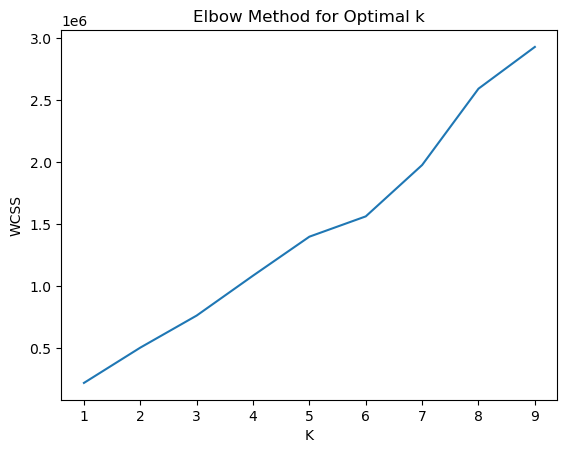

In [208]:
def euclidean_distance(point1, point2):
    distance = 0
    for col in point1.index:  # Iterate over the columns
        distance += (point1[col] - point2[col]) ** 2
    return distance ** 0.5



def wcss(data, centroids):
    wcss_value = 0
    for _, centroid in centroids.iterrows():
        distance = data.apply(lambda point: euclidean_distance(point, centroid), axis=1)
        min_distance = distance.min()
        wcss_value += distance.sum()
    return wcss_value



df2_normalized = (df2 - df2.min()) / (df2.max() - df2.min())


k_values = list(range(1, 10))
wcss_values = []


for k in k_values:
    random_centroids = df2.sample(k)
    wcss_values.append(wcss(df2, random_centroids))


sns.lineplot(x=k_values, y=wcss_values)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [201]:
df2.iloc[0]

k_values = list(range(1, 11))
for k in k_values:
    random_centroids = df2.sample(k)

#print(random_centroids)

for _, centroid in random_centroids.iterrows():
    distance = df2.apply(lambda point: euclidean_distance(point, centroid), axis=1)
df2["Distance"] = distance

print(df2["Distance"].min())

0.0


In [198]:
df2.describe()

,Gender,Ever_Married,Age,Family_Size,ProfessionFactor,Spending_Score_Factor,State_Purchased_Factor,Distance
count,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,0.550776,0.592787,43.568507,2.844247,3.924642,0.552488,18.132883,29.630134
std,0.497440,0.491340,16.720325,1.535777,2.316856,0.742801,11.032006,13.515371
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,31.000000,2.000000,1.000000,0.000000,10.000000,19.150720
50%,1.000000,1.000000,41.000000,2.500000,5.000000,0.000000,18.000000,28.736169
75%,1.000000,1.000000,53.000000,4.000000,5.000000,1.000000,26.000000,40.108491
max,1.000000,1.000000,89.000000,9.000000,8.000000,2.000000,49.000000,62.896753
